# Analysis of SARS-COV-2 virus neutalization in different Ace2 clones

This notebook analysis neutralization of SARS-COV-2/Wu-1 virus by sera from vaccinated individuals on 293T cell clones that express different levels of ACE2.

### Set up Analysis

In [1]:
import os
import warnings

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
from plotnine import *
import seaborn

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml

In [2]:
warnings.simplefilter('ignore')

Read config file.

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

Set seaborn theme:

In [4]:
theme_set(theme_seaborn(style='white', context='talk', font_scale=1))
plt.style.use('seaborn-white')

In [5]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

## Read in data
We read in fraction infectivirty data for different cell lines and import sera information.

In [6]:
frac_infect = list() # create df list

for f in config['depletion_neuts'].keys():
    df = (pd.read_csv(f, index_col=0))
    frac_infect.append(df)  
frac_infect = pd.concat(frac_infect)

frac_infect['serum'] = frac_infect['serum'] + '__' + frac_infect['cells']

frac_infect['virus'] = frac_infect['virus'].str.replace('post-depletion','depleted')
frac_infect['virus'] = frac_infect['virus'].str.replace('pre-depletion','not depleted')


In [7]:
#read in sample info
sample_information = (pd.read_csv(config['sample_information'])
                      .drop_duplicates())

sample_information['sorted']=sample_information['subject_name'].str[:-1].astype(int)
sample_information = sample_information.sort_values('sorted')

#store sera names in a list to later convert to factors for plotting
cat_order_sera = sample_information['serum'].tolist()


## Fit Hill curve 

We use [`neutcurve`](https://jbloomlab.github.io/neutcurve/) to fit Hill curve for neutralization data and calcualte IC50 and NT50 values.

In [8]:
fits = neutcurve.CurveFits(frac_infect, fixbottom= False)

fitparams = (
    fits.fitParams()
    .rename(columns={'virus': 'RBD-targeting antibodies'})
    [['serum', 'RBD-targeting antibodies', 'ic50', 'ic50_bound']]
    .assign(NT50=lambda x: 1/x['ic50'])

    )

In [9]:
fitparams

,serum,RBD-targeting antibodies,ic50,ic50_bound,NT50
0,63C-day-10__very low,not depleted,0.000031,interpolated,31968.943613
1,63C-day-10__very low,depleted,0.000454,interpolated,2200.799322
2,64C-day-15__very low,not depleted,0.000064,interpolated,15594.993852
3,64C-day-15__very low,depleted,0.000199,interpolated,5029.538042
4,99C-day-27__very low,not depleted,0.000096,interpolated,10374.149491
5,99C-day-27__very low,depleted,0.000435,interpolated,2296.488086
6,108C-day-18__very low,not depleted,0.000038,interpolated,26336.105034
7,108C-day-18__very low,depleted,0.000225,interpolated,4450.299723
8,120C-day-10__very low,not depleted,0.000027,interpolated,36527.531964
9,120C-day-10__very low,depleted,0.000218,interpolated,4588.546268


In [10]:
fitparams['ic50_is_bound'] = fitparams['ic50_bound'].apply(lambda x: True if x!='interpolated' else False)


In [11]:
fitparams[['sample', 'cells']] = fitparams['serum'].str.split('__', 1, expand=True)

In [12]:
fitparams

,serum,RBD-targeting antibodies,ic50,ic50_bound,NT50,ic50_is_bound,sample,cells
0,63C-day-10__very low,not depleted,0.000031,interpolated,31968.943613,False,63C-day-10,very low
1,63C-day-10__very low,depleted,0.000454,interpolated,2200.799322,False,63C-day-10,very low
2,64C-day-15__very low,not depleted,0.000064,interpolated,15594.993852,False,64C-day-15,very low
3,64C-day-15__very low,depleted,0.000199,interpolated,5029.538042,False,64C-day-15,very low
4,99C-day-27__very low,not depleted,0.000096,interpolated,10374.149491,False,99C-day-27,very low
5,99C-day-27__very low,depleted,0.000435,interpolated,2296.488086,False,99C-day-27,very low
6,108C-day-18__very low,not depleted,0.000038,interpolated,26336.105034,False,108C-day-18,very low
7,108C-day-18__very low,depleted,0.000225,interpolated,4450.299723,False,108C-day-18,very low
8,120C-day-10__very low,not depleted,0.000027,interpolated,36527.531964,False,120C-day-10,very low
9,120C-day-10__very low,depleted,0.000218,interpolated,4588.546268,False,120C-day-10,very low


In [13]:
#category for cell order so that ggplot does not use alphabetical
cat_order = ['very low', 'low', 'medium', 'high']
fitparams['cells'] = pd.Categorical(fitparams['cells'], categories=cat_order, ordered=True)

fitparams['sample'] = pd.Categorical(fitparams['sample'], categories=cat_order_sera, ordered=True)

In [14]:
#save data
fitparams.to_csv(config['neuts'], index=False)

## Plot IC50 values

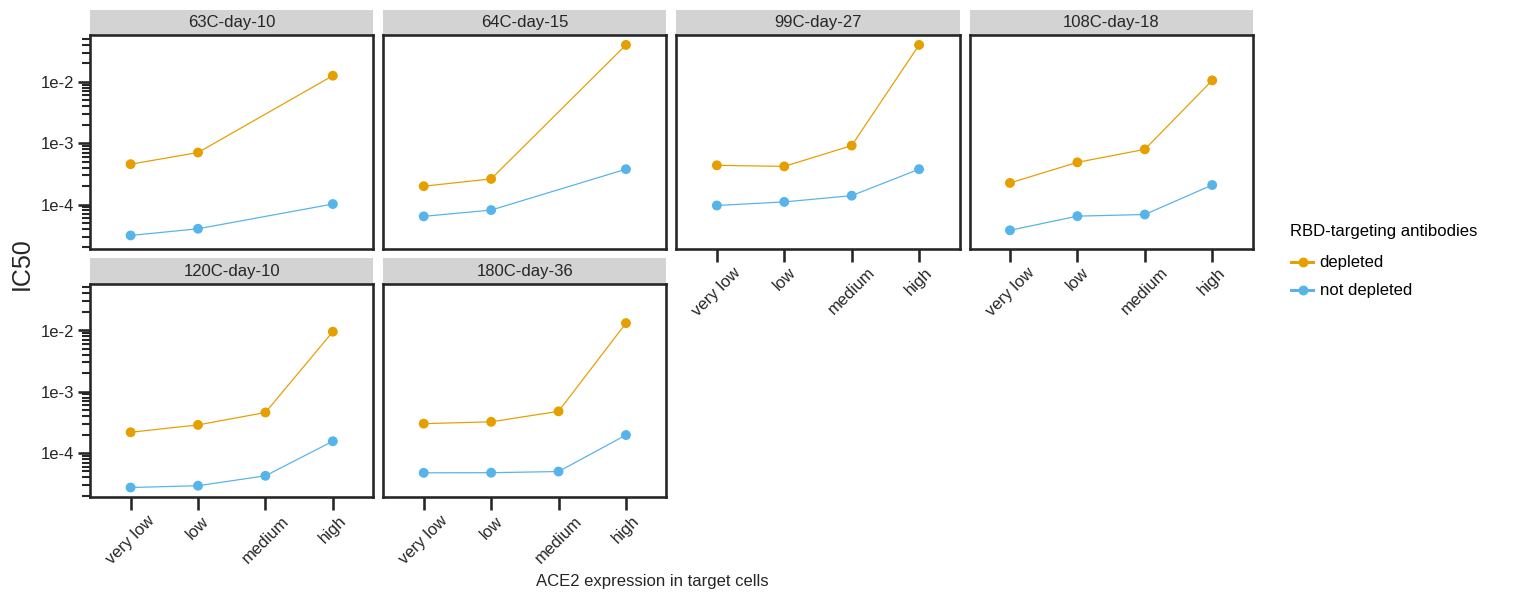

In [15]:
IC50 = (ggplot(fitparams, aes(x='cells', y='ic50', colour='RBD-targeting antibodies', group = 'RBD-targeting antibodies')) +
              geom_point(size=3) +
        geom_line(alpha=1) +
             theme(figure_size=(15,1*df['serum'].nunique()),
                   axis_text=element_text(size=12),
                   axis_text_x=element_text(size=12, angle= 45),
                   legend_text=element_text(size=12),
                   legend_title=element_text(size=12),
                   axis_title_x=element_text(size=12),
                   strip_text = element_text(size=12)
                  ) +
              facet_wrap('sample', ncol = 4)+
              scale_y_log10(name='IC50') +
              xlab('ACE2 expression in target cells') +
             scale_color_manual(values=CBPALETTE[1:])
                 )

_ = IC50.draw()
IC50.save(f'./{resultsdir}/IC50.pdf')

## Plot NT50 values

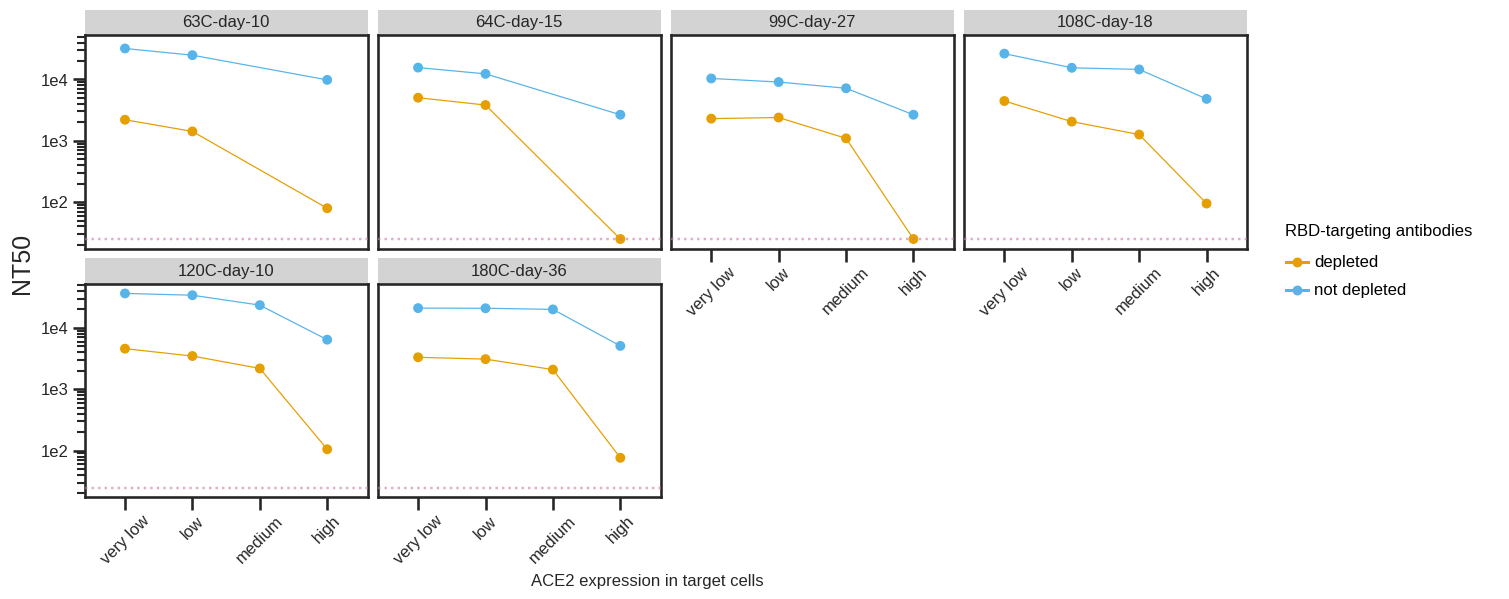

In [16]:
NT50 = (ggplot(fitparams, aes(x='cells', y='NT50', colour='RBD-targeting antibodies', group = 'RBD-targeting antibodies')) +
              geom_point(size=3) +
             geom_line(alpha=1) +
             theme(figure_size=(15,1*df['serum'].nunique()),
                   axis_text=element_text(size=12),
                   axis_text_x=element_text(size=12, angle= 45),
                   legend_text=element_text(size=12),
                   legend_title=element_text(size=12),
                   axis_title_x=element_text(size=12),
                   strip_text = element_text(size=12)
                  ) +
                geom_hline(yintercept=config['NT50_LOD'], 
                linetype='dotted', 
                size=1, 
                alpha=0.6, 
                color=CBPALETTE[7]) +
              facet_wrap('sample', ncol = 4)+
              scale_y_log10(name='NT50') +
              xlab('ACE2 expression in target cells') +
             scale_color_manual(values=CBPALETTE[1:])
                 )

_ = NT50.draw()
NT50.save(f'./{resultsdir}/NT50.pdf')

## Plot neut curves for all samples

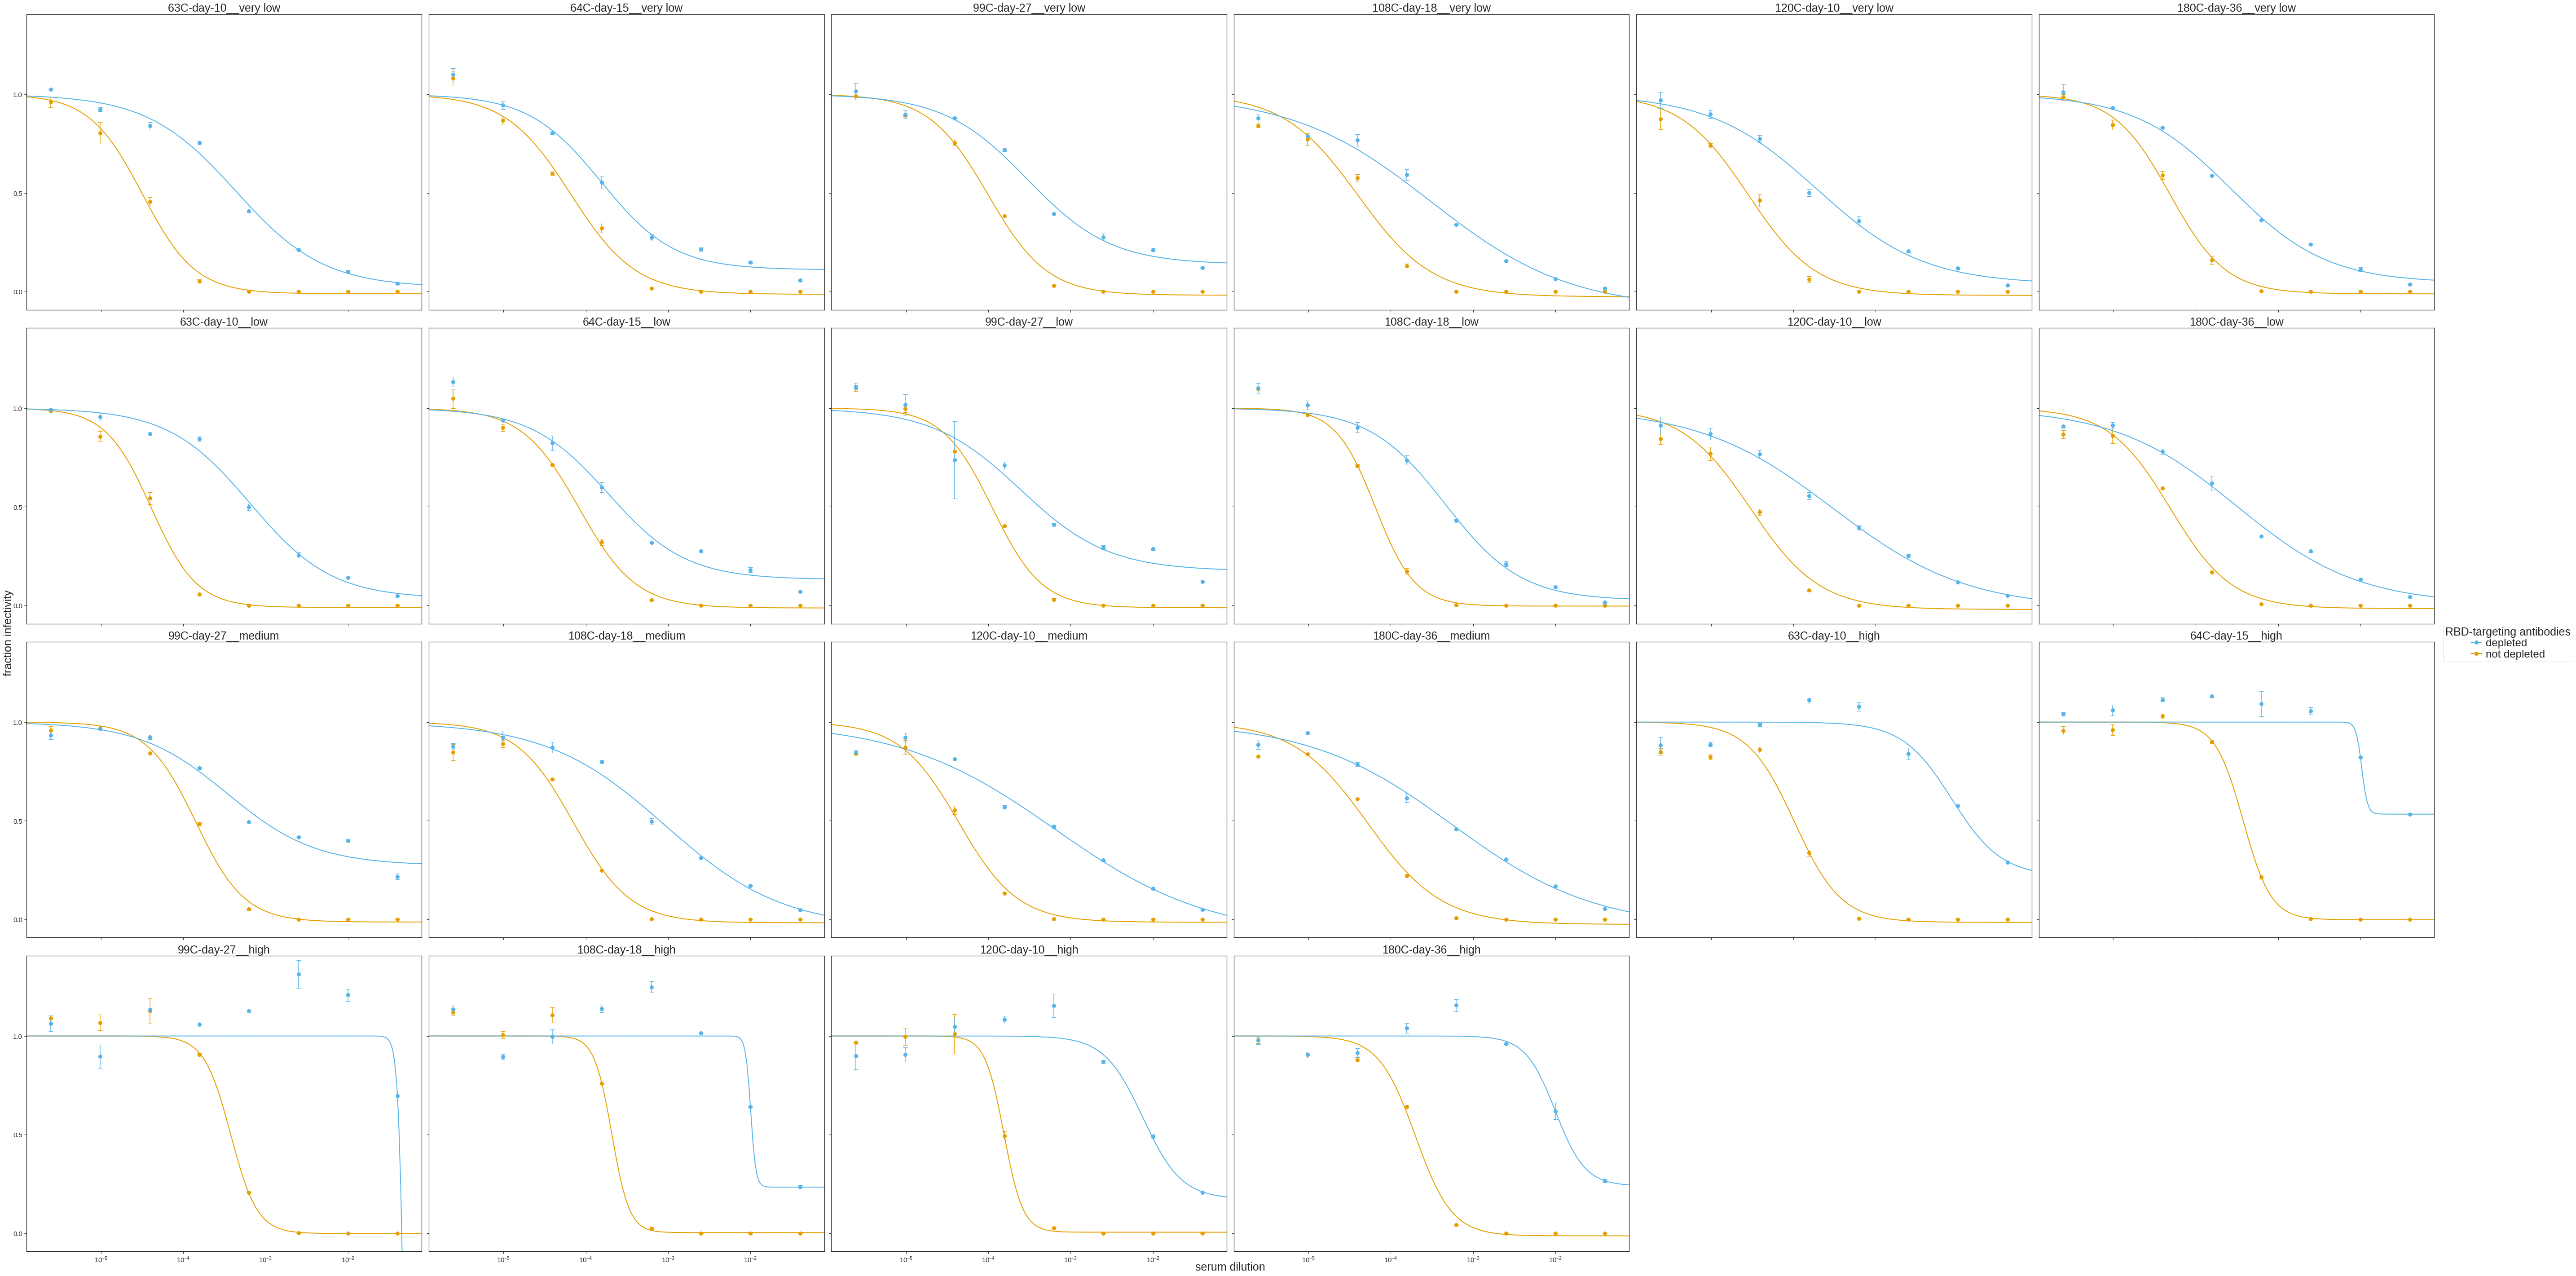

In [17]:
fig, axes = fits.plotSera(
                          xlabel='serum dilution',
                          ncol=6,
                          widthscale=4,
                          heightscale=4,
                          titlesize=25, labelsize=25, ticksize=15, legendfontsize=24, yticklocs=[0,0.5,1],
                          markersize=8, linewidth=2,
                          virus_to_color_marker={
                          'depleted': ('#56B4E9', 'o'),
                          'not depleted': ('#E69F00', 'o')},
                          legendtitle='RBD-targeting antibodies'
                         )